In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gp
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report,ConfusionMatrixDisplay
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

In [2]:
# Load the dataset 
data = pd.read_csv("data/zomato_df_final_data.csv")
data.head()

address   cost  \
0                      371A Pitt Street, CBD, Sydney   50.0   
1      Shop 7A, 2 Huntley Street, Alexandria, Sydney   80.0   
2   Level G, The Darling at the Star, 80 Pyrmont ...  120.0   
3   Sydney Opera House, Bennelong Point, Circular...  270.0   
4              20 Campbell Street, Chinatown, Sydney   55.0   

                                       cuisine        lat  \
0   ['Hot Pot', 'Korean BBQ', 'BBQ', 'Korean'] -33.876059   
1  ['Cafe', 'Coffee and Tea', 'Salad', 'Poké'] -33.910999   
2                                 ['Japanese'] -33.867971   
3                        ['Modern Australian'] -33.856784   
4                            ['Thai', 'Salad'] -33.879035   

                                                link         lng  \
0    https://www.zomato.com/sydney/sydney-madang-cbd  151.207605   
1  https://www.zomato.com/sydney/the-grounds-of-a...  151.193793   
2        https://www.zomato.com/sydney/sokyo-pyrmont  151.195210   
3  https://www.zomato.com/sydney/bennelong-restau...  151.215297   
4  https://www.zomato.com/sydney/chat-thai-chinatown  151.206409   

          phone  rating_number rating_text  \
0  02 8318 0406            4.0   Very Good   
1  02 9699 2225            4.6   Excellent   
2  1800 700 700            4.9   Excellent   
3  02 9240 8000            4.9   Excellent   
4  02 8317 4811            4.5   Excellent   

                                 subzone                           title  \
0                                    CBD                   Sydney Madang   
1  The Grounds of Alexandria, Alexandria  The Grounds of Alexandria Cafe   
2                      The Star, Pyrmont                           Sokyo   
3                          Circular Quay            Bennelong Restaurant   
4                              Chinatown                       Chat Thai   

                     type   votes  groupon    color     cost_2 cuisine_color  
0       ['Casual Dining']  1311.0    False  #e15307   5.243902       #6f706b  
1                ['Café']  3236.0    False  #9c3203   7.560976       #6f706b  
2         ['Fine Dining']  1227.0    False  #7f2704  10.650407       #6f706b  
3  ['Fine Dining', 'Bar']   278.0    False  #7f2704  22.235772       #4186f4  
4       ['Casual Dining']  2150.0    False  #a83703   5.630081       #6f706b

## PART A

 Total No: of unique cuisines served by Sydney restaurants: 134


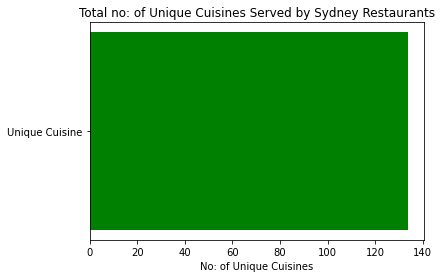

In [3]:
# How many unique cuisines are served by Sydney restaurants?

unique_cuisine = set()  # empty set to store unique cuisines for each restaurant

for index in range(len(data)):
    row = data.iloc[index]  
    cuisine_new_list = row['cuisine'].strip('[]').replace("'", "").split(', ') #extract the list of cuisines
    unique_cuisine.update(cuisine_new_list)     # update each cuisine to the set

# Get the count of unique cuisines
no_unique_cuisine = len(unique_cuisine)

print(f" Total No: of unique cuisines served by Sydney restaurants: {no_unique_cuisine}")

# a bar plot for the number of unique cuisines
plt.barh(["Unique Cuisine"], [no_unique_cuisine], color='green')
plt.title('Total no: of Unique Cuisines Served by Sydney Restaurants')
plt.xlabel('No: of Unique Cuisines')
plt.show()


Most popular suburbs
CBD            476
Surry Hills    260
Parramatta     225
Name: subzone, dtype: int64


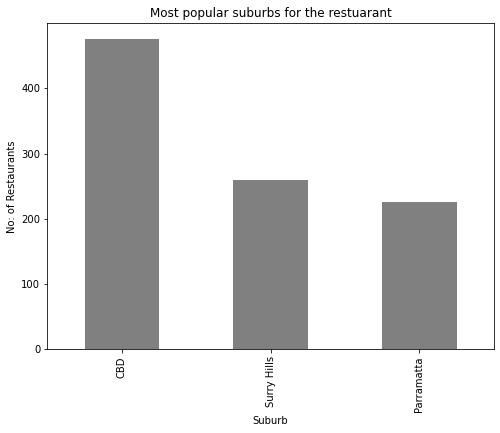

In [4]:
# Which suburbs (top-3) have the highest number of restaurants?
top3_suburbs = data['subzone'].value_counts().head(3)
print("Most popular suburbs")
print(top3_suburbs)

# Plot the top suburbs
plt.figure(figsize=(8, 6))
top3_suburbs.plot(kind='bar', color='grey')
plt.title('Most popular suburbs for the restuarant')
plt.xlabel('Suburb')
plt.ylabel('No: of Restaurants')
plt.show()

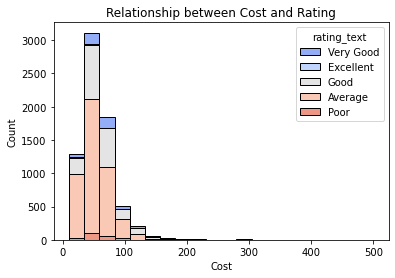

In [5]:
# comparison between 'cost' and 'rating_text using '
sns.histplot(data, x='cost', hue='rating_text', multiple='stack', bins=20, palette='coolwarm')
plt.title("Relationship between Cost and Rating")
plt.xlabel("Cost")
plt.ylabel("Count")
plt.show()

From the above graph ,it is very clear that the restaurants with excellent rating are highly expensive while poor rating are rarely expensive.

C:\Users\win\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


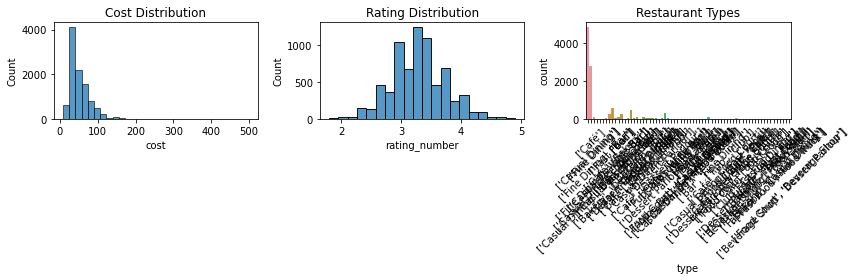

In [6]:
# Perform exploratory analysis for the variables of the data.
#Cost
plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
sns.histplot(data['cost'], bins=30)
plt.title('Cost Distribution')

#Rating_number
plt.subplot(1, 3, 2)
sns.histplot(data['rating_number'], bins=20)
plt.title('Rating Distribution')

#Type
plt.subplot(1, 3, 3)
sns.countplot(data['type'])
plt.title('Restaurant Types')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

From the cost distribution graph, it can be seen that histogram is right skewed that is there are few restauarants with high cost but the majority of restaurants have more affordable pricing ,while in rating distribution, there are relatively few restaurants with extremely low or high ratings, indicating that most restaurants fall within the average rating range. The type distribution shows that most common restaurant type in the dataset is Casual Dining followed by other types like Quick Bites and cafe.

<ipython-input-30-389298f6d06c>:11: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: EPSG:4326
Right CRS: None

  joined_gdf = gp.sjoin(geo_data, filtered_gdf, how='left', predicate='contains')   # spatial join


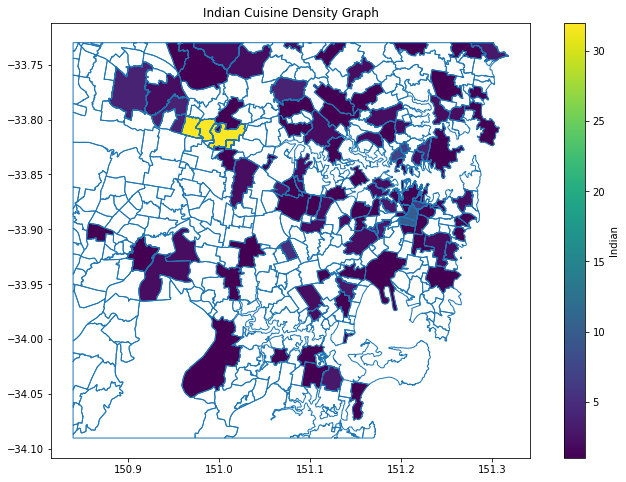

<ipython-input-30-389298f6d06c>:11: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: EPSG:4326
Right CRS: None

  joined_gdf = gp.sjoin(geo_data, filtered_gdf, how='left', predicate='contains')   # spatial join


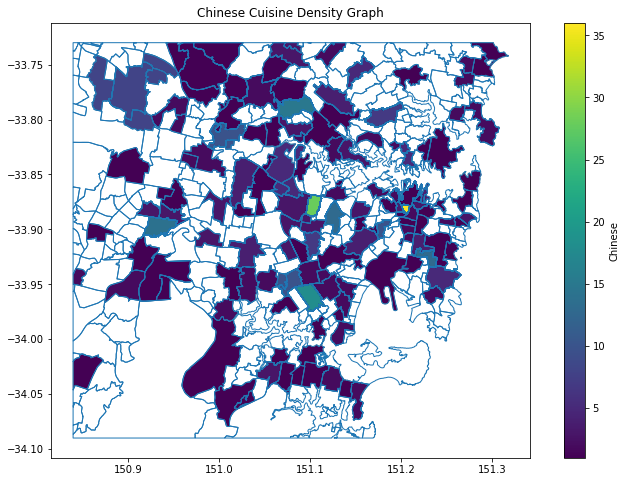

In [30]:
#Create a map illustrating cuisine density, where each suburb is visually
#represented with colors indicating the number of restaurants offering a specific cuisine."

# Function to plot cuisine density map
def show_cuisinemap(cuisine):
    geo_data =gp.read_file("data/sydney.geojson")
    # Filter restaurants that serve the specified cuisine
    geo = gp.GeoDataFrame(data, geometry=gp.points_from_xy(data.lng, data.lat))
    filtered_gdf = geo[geo['cuisine'].str.contains(cuisine, case=False, na=False)]
  
    joined_gdf = gp.sjoin(geo_data, filtered_gdf, how='left', predicate='contains')   # spatial join

    joined_gdf['count'] = joined_gdf.groupby('subzone')['subzone'].transform('count') # Count the number of restaurants in each suburb

    # Plot
    fig, ax = plt.subplots(1, figsize=(12, 8))
    joined_gdf.boundary.plot(ax=ax, linewidth=1)
    joined_gdf.plot(column='count', ax=ax, legend=True,
                    legend_kwds={'label':  cuisine},
                    cmap='viridis', linewidth=0.6, edgecolor='0.5')

    plt.title(f"{cuisine} Cuisine Density Graph")
    plt.show()

show_cuisinemap('Indian')

show_cuisinemap('Chinese')

In [8]:
data.head()


address   cost  \
0                      371A Pitt Street, CBD, Sydney   50.0   
1      Shop 7A, 2 Huntley Street, Alexandria, Sydney   80.0   
2   Level G, The Darling at the Star, 80 Pyrmont ...  120.0   
3   Sydney Opera House, Bennelong Point, Circular...  270.0   
4              20 Campbell Street, Chinatown, Sydney   55.0   

                                       cuisine        lat  \
0   ['Hot Pot', 'Korean BBQ', 'BBQ', 'Korean'] -33.876059   
1  ['Cafe', 'Coffee and Tea', 'Salad', 'Poké'] -33.910999   
2                                 ['Japanese'] -33.867971   
3                        ['Modern Australian'] -33.856784   
4                            ['Thai', 'Salad'] -33.879035   

                                                link         lng  \
0    https://www.zomato.com/sydney/sydney-madang-cbd  151.207605   
1  https://www.zomato.com/sydney/the-grounds-of-a...  151.193793   
2        https://www.zomato.com/sydney/sokyo-pyrmont  151.195210   
3  https://www.zomato.com/sydney/bennelong-restau...  151.215297   
4  https://www.zomato.com/sydney/chat-thai-chinatown  151.206409   

          phone  rating_number rating_text  \
0  02 8318 0406            4.0   Very Good   
1  02 9699 2225            4.6   Excellent   
2  1800 700 700            4.9   Excellent   
3  02 9240 8000            4.9   Excellent   
4  02 8317 4811            4.5   Excellent   

                                 subzone                           title  \
0                                    CBD                   Sydney Madang   
1  The Grounds of Alexandria, Alexandria  The Grounds of Alexandria Cafe   
2                      The Star, Pyrmont                           Sokyo   
3                          Circular Quay            Bennelong Restaurant   
4                              Chinatown                       Chat Thai   

                     type   votes  groupon    color     cost_2 cuisine_color  
0       ['Casual Dining']  1311.0    False  #e15307   5.243902       #6f706b  
1                ['Café']  3236.0    False  #9c3203   7.560976       #6f706b  
2         ['Fine Dining']  1227.0    False  #7f2704  10.650407       #6f706b  
3  ['Fine Dining', 'Bar']   278.0    False  #7f2704  22.235772       #4186f4  
4       ['Casual Dining']  2150.0    False  #a83703   5.630081       #6f706b

# Part B -Predictive Modelling

### 1.Feature engineering

##### Data cleaning and preprocessing

In [9]:
#Check for null values in the dataset
null_values = data.isnull().sum()
print(null_values)

#Drop rows with NA in rating_number
data.dropna(subset=['rating_number'], inplace=True)

#Handle column cuisine which is in lists by spliting comma-separated values
data['cuisine'] = data['cuisine'].str.split(', ')
data = data.explode('cuisine') #Explode the lists into separate rows


address             0
cost              346
cuisine             0
lat               192
link                0
lng               192
phone               0
rating_number    3316
rating_text      3316
subzone             0
title               0
type               48
votes            3316
groupon             0
color               0
cost_2            346
cuisine_color       0
dtype: int64


In [10]:
#Cheching for categorical variables
categorical_variable = [var for var in data.columns if data[var].dtype=='O']
data[categorical_variable].head()
print("The categorical variables are: ", categorical_variable)

#checking for numerical variables
numerical_variable = [var for var in data.columns if data[var].dtype != 'O']
print('The numerical variables are :', numerical_variable)

The categorical variables are:  ['address', 'cuisine', 'link', 'phone', 'rating_text', 'subzone', 'title', 'type', 'color', 'cuisine_color']
The numerical variables are : ['cost', 'lat', 'lng', 'rating_number', 'votes', 'groupon', 'cost_2']


In [11]:
#Handle missing values in categorical variables
#Replace missing values in 'type' column with 'unknown'
data['type'].fillna('unknown', inplace=True)

# Handle missing values in numerical variables
# Replace missing values in 'cost' column with the mean cost
data['cost'].fillna(data['cost'].mean(), inplace=True)

##### Feature Encoding

In [12]:
## Encode categorical features
label_encoder = LabelEncoder()
data['type_encode'] = label_encoder.fit_transform(data['type'])
data['subzone_encode'] = label_encoder.fit_transform(data['subzone'])
data['rating_encode'] = label_encoder.fit_transform(data['rating_text'])
data['cuisine_encode'] = label_encoder.fit_transform(data['cuisine'])
data['title_encode'] = label_encoder.fit_transform(data['title'])


In [13]:
data.head()

address  cost       cuisine  \
0                   371A Pitt Street, CBD, Sydney  50.0    ['Hot Pot'   
0                   371A Pitt Street, CBD, Sydney  50.0  'Korean BBQ'   
0                   371A Pitt Street, CBD, Sydney  50.0         'BBQ'   
0                   371A Pitt Street, CBD, Sydney  50.0     'Korean']   
1   Shop 7A, 2 Huntley Street, Alexandria, Sydney  80.0       ['Cafe'   

         lat                                               link         lng  \
0 -33.876059    https://www.zomato.com/sydney/sydney-madang-cbd  151.207605   
0 -33.876059    https://www.zomato.com/sydney/sydney-madang-cbd  151.207605   
0 -33.876059    https://www.zomato.com/sydney/sydney-madang-cbd  151.207605   
0 -33.876059    https://www.zomato.com/sydney/sydney-madang-cbd  151.207605   
1 -33.910999  https://www.zomato.com/sydney/the-grounds-of-a...  151.193793   

          phone  rating_number rating_text  \
0  02 8318 0406            4.0   Very Good   
0  02 8318 0406            4.0   Very Good   
0  02 8318 0406            4.0   Very Good   
0  02 8318 0406            4.0   Very Good   
1  02 9699 2225            4.6   Excellent   

                                 subzone  ...   votes groupon    color  \
0                                    CBD  ...  1311.0   False  #e15307   
0                                    CBD  ...  1311.0   False  #e15307   
0                                    CBD  ...  1311.0   False  #e15307   
0                                    CBD  ...  1311.0   False  #e15307   
1  The Grounds of Alexandria, Alexandria  ...  3236.0   False  #9c3203   

     cost_2 cuisine_color  type_encode subzone_encode  rating_encode  \
0  5.243902       #6f706b           28             57              4   
0  5.243902       #6f706b           28             57              4   
0  5.243902       #6f706b           28             57              4   
0  5.243902       #6f706b           28             57              4   
1  7.560976       #6f706b           19            448              1   

   cuisine_encode  title_encode  
0             293          5743  
0             107          5743  
0               8          5743  
0             110          5743  
1             238          6218  

[5 rows x 22 columns]

### Regression

In [14]:
# Select features and target variable
X = data[['type_encode', 'subzone_encode','cost','cuisine_encode','rating_encode']]
y = data['rating_number']


In [15]:
# Split the data into train (80%) and test (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

##### Model 1

In [16]:
# Linear Regression Model 1
model1_regression = LinearRegression()
model1_regression.fit(X_train, y_train)

LinearRegression()

In [17]:
y_pred = model1_regression.predict(X_test)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE) for Model 1: {mse}")

Mean Squared Error (MSE) for Model 1: 0.11810300304583705


##### Model 2

In [18]:
# Linear Regression Model 2 with Gradient Descent
model2_regression = SGDRegressor(max_iter=1000, tol=1e-3, random_state=0)
model2_regression.fit(X_train, y_train)

y_pred_2 = model2_regression.predict(X_test)

# Calculate Mean Squared Error (MSE) for Model 2
mse_2 = mean_squared_error(y_test, y_pred_2)
print("Mean Squared Error (MSE) for Model 2:", mse_2)

Mean Squared Error (MSE) for Model 2: 2.486780100979186e+26


### Classification

In [19]:
# Simplify the problem into binary classifications:
# Class 1: 'Poor' and 'Average' records
# Class 2: 'Good', 'Very Good', and 'Excellent' records
data['class'] = data['rating_text'].apply(lambda x: 'Class 1' if x in ['Poor', 'Average'] else 'Class 2')

In [20]:
#Select features and target variable
X = data[['type_encode', 'subzone_encode','cost','cuisine_encode','rating_encode','title_encode']]
y = data['class']

In [21]:
# Split the data into train (80%) and test (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Create and fit the Logistic Regression model for binary classification
model3_classification = LogisticRegression(random_state=0)
model3_classification.fit(X_train, y_train)



C:\Users\win\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=0)

[[1468   64]
 [  16  800]]
Performance Report:
              precision    recall  f1-score   support

     Class 1       0.99      0.96      0.97      1532
     Class 2       0.93      0.98      0.95       816

    accuracy                           0.97      2348
   macro avg       0.96      0.97      0.96      2348
weighted avg       0.97      0.97      0.97      2348



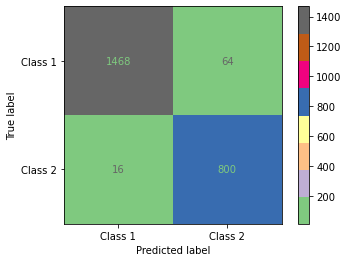

In [22]:
# Make predictions on the test set
y_pred3 = model3_classification.predict(X_test)

# Calculate the confusion matrix
confusion_matrix = confusion_matrix(y_test, y_pred3)

# Print the confusion matrix
print(confusion_matrix)

# Generate and print a classification report
performance_report = classification_report(y_test, y_pred3)
print("Performance Report:")
print(performance_report)

#Display Confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix, display_labels=['Class 1', 'Class 2'])
disp.plot(cmap='Accent', values_format='d')

The model exhibits a low number of false positives and false negatives, which shows that it performs well in accurately distinguishing between Class 1 and Class 2.From the performance report, it is very clear that the model achieves a high accuracy ,that is about 97% which indicates that it correctly classifies into their respective classes (Class 1 and Class 2).
Overall, the model produces high accuracy,precision and recall for both classes.

### Bonus points

##### SVM Model

In [23]:
model_svm = SVC(random_state=0)
model_svm.fit(X_train, y_train)
y_pred_svm = model_svm.predict(X_test)
print(classification_report(y_test, y_pred_svm))

              precision    recall  f1-score   support

     Class 1       0.65      1.00      0.79      1532
     Class 2       0.00      0.00      0.00       816

    accuracy                           0.65      2348
   macro avg       0.33      0.50      0.39      2348
weighted avg       0.43      0.65      0.52      2348



C:\Users\win\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\win\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\win\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


##### Decision Tree

In [24]:
model_dt = DecisionTreeClassifier(random_state=0)
model_dt.fit(X_train, y_train)
y_pred_dt = model_dt.predict(X_test)
print(classification_report(y_test, y_pred_dt))


              precision    recall  f1-score   support

     Class 1       1.00      1.00      1.00      1532
     Class 2       1.00      1.00      1.00       816

    accuracy                           1.00      2348
   macro avg       1.00      1.00      1.00      2348
weighted avg       1.00      1.00      1.00      2348

